# SEGMENTAÇÃO DE CLIENTES UTILIZANDO CLUSTERIZAÇÃO

Este projeto tem por objetivo desenvolver um modelo de Machine Learning não supervisonado para segmentar clientes frequentadores de um shopping.

os dados foram extraidos do Kaggle: 
https://www.kaggle.com/shwetabh123/mall-customers

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np

In [2]:
# Importando a biblioteca "warnings" para ignorar mensagens de erro
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importando o arquivo CSV e criando um dataframe
df = pd.read_csv("/content/drive/MyDrive/MACHINE_LEARNNING/Mall_Customers.csv", sep=",", encoding="iso-8859-1")

In [4]:
# Visualizando as 5 primeiras linhas do dataframe
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# ATRIBUTOS:
* CustomerID: Identificação do cliente
* Genre: Gênero
* Age: Idade
* Annual Income (k$): Rendimento anual
* Spending Score (1-100): Pontuação de gastos

# Visualização gráfica dos dados

## Idade

In [5]:
# Importando o Plotly para criar representações gráficas dos atributos
import plotly.express as px

In [6]:
# Criando um histograma com o atributo Age ( Idade )
hist = px.histogram( df, x = "Age", nbins = 60)
hist.update_layout (width = 600, height = 400, title_text = "Distribuição de Idades")
hist.show()

O gráfico mostra uma distribuição diversificada entre as idades, sendo a 
menor idade 18 anos com 4 contagens e a idade máxima 70 anos com 2 contagens.

## Gênero

In [7]:
# Agora veremos as distribuições de gênero
hist = px.histogram( df, x = "Genre", nbins = 60)
hist.update_layout (width = 600, height = 400, title_text = "Distribuição de gênero")
hist.show()
df["Genre"].value_counts() # contagem por tipo

Female    112
Male       88
Name: Genre, dtype: int64

In [8]:
# Visualizando a quantidade de linhas e colunas
df.shape

(200, 5)

# Exploração e tratamento dos dados

## Alterando o nome das colunas

In [9]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# Alterando o nome da coluna Genre para Gênero
df.rename(columns={"Genre":"genero"},inplace=True)

In [11]:
# Alterando o nome da coluna Age para Idade
df.rename(columns={"Age":"idade"},inplace=True)

In [12]:
# Alterando o nome da coluna Annual Income (k$) para Rendimento 
df.rename(columns={"Annual Income (k$)":"rendimento"},inplace=True)

In [13]:
# Alterando o nome da coluna Spending Score (1-100) para Pontuação
df.rename(columns={"Spending Score (1-100)":"pontuacao"},inplace=True)

In [14]:
df.head()

,CustomerID,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
# Obs.: não alterei a coluna CustomerID porque ela será irrelevante e será excluída

## Valores Missing ( NAN )

In [16]:
df.isnull().sum()

CustomerID    0
genero        0
idade         0
rendimento    0
pontuacao     0
dtype: int64

Verificamos que não existem valores nulos.

## Análise dos tipos de atributos:
* object = string
* int64 = números inteiros
* float64 = números reais
* complex = números complexos


Obs.: Lembrando que não é possivel desenvolver modelos de machine learning usando atributos do tipo OBJECT

In [17]:
df.dtypes

CustomerID     int64
genero        object
idade          int64
rendimento     int64
pontuacao      int64
dtype: object

## Dados estatísticos

In [18]:
df.describe()

,CustomerID,idade,rendimento,pontuacao
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Podemos verificar que:
* A amostra possui 200 elementos
* A média de idade dos frequentadores do shopping fica em 38, e a mediana 36
* A idade mínima é 18 e a máxima é 70
* O rendimento máximo encontrado foi de $137000
* A pontuação média fica em 50.2

## Análise de Outliers ( Dados discrepantes )

Para essa análise utilizamos o gráfico boxplot

In [19]:
# Importando o Plotly para criar representações gráficas dos atributos
import plotly.express as px

In [20]:
boxplot = px.box( df, y = "rendimento")
boxplot.show()

Obs.: Rendimentos possui um valor fora do padrão de 137 mil, acima do valor máximo de 129 mil. Por não ser um valor tão distante podemos manter no modelo.

In [21]:
boxplot = px.box( df, y = "idade")
boxplot.show()

In [22]:
boxplot = px.box( df, y = "pontuacao")
boxplot.show()

Nenhum dado discrepante encontrado nos outros atributos.

# Pré-processamento

O pré-processamento é uma etapa fundamental que pode melhorar a performance dos algoritmos de análise, através da redução de dimensionalidade e eliminação de ruidos que interfiram no funcionamento dos algoritmos. 

In [23]:
df.head()

,CustomerID,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Excluindo o atributo CustomerID

O atributo CustomerID não possui relevância para o modelo pois ele apenas emumera os elementos. Deste modo ele deve ser excluído.

In [24]:
# Criando um novo dataframe para receber os dados, excluindo o atributo CustomerID.

In [25]:
df2 = df.drop(labels="CustomerID",axis=1) # lembrando que axis significa eixo e 1 equivale a coluna.
df2.head()

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Transformando dados categóricos em dados numéricos

In [26]:
df2["genero"].replace({"Female":0,"Male":1},inplace=True) # Inplace = True altera os dados de forma permanente no dataframe atual
df2.head()

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Escalonamento

O objetivo do escalonamento é mudar os valores das colunas numéricas no conjunto de dados para usar uma escala comum, sem distorcer as diferenças nos intervalos de valores nem perder informações. O escalonamento ( normalização ) também é necessário para alguns algoritmos para modelar os dados corretamente.
O escalonamento considera média próxima de zero e desvio padrão próximo de 1.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2) # Criando um novo dataframe com os dados escalonados

In [29]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

# K-means com dois atributos

Inicialmente usaremos apenas dois atributos para o modelo, que neste caso será os atributos rendimento e pontuacao

In [30]:
# Criando um novo dataframe para receber apenas os atributos rendimento e pontuacao usando os indices
dados = df2.iloc[:,[2,3]].values
dados

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Método Elbow - identifica o número de clusters adequado para o modelo





In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 5, max_iter=300)
    kmeans.fit(dados)
    # inertia - Método para gerar o wcss
    wcss.append(kmeans.inertia_)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'WCSS')

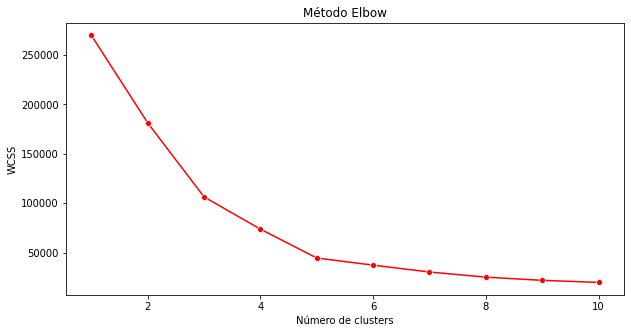

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), wcss, marker="o", color="red")
plt.title("Método Elbow")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")

In [34]:
# Através do gráfico é possivel identificar o ponto de inflexão, que neste caso seria o 4
# O ponto de inflexão representa a quantidade ideal de clusters

## Agrupamento

In [35]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 5, max_iter = 300)

In [36]:
kmeans1 = kmeans.fit(dados)

In [37]:
# Coordenadas dos centróides
centroides = kmeans1.cluster_centers_
centroides

array([[48.26      , 56.48      ],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [87.        , 18.63157895]])

In [38]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [39]:
# Usando como exemplo o grupo da 3º linha
dados[3,:]

array([16, 77])

In [40]:
# Visualizando a classificação do 3º elemento 
classificacao[3]

0

Visualizando graficamente com PLOTLY os agrupamentos por grupo

In [41]:
import plotly.express as px
import plotly.graph_objects as go

In [42]:
graf1 = px.scatter( x = dados[:,0], y = dados[:,1], color = classificacao)
graf2 = px.scatter( x = centroides[:,0], y = centroides[:,1], size = [15,15,15,15])
graf3 = go.Figure( data = graf1.data + graf2.data)
graf3.update_layout( width=800, height = 500, title_text="Agrupamento K-means")
graf3.update_xaxes(title="Rendimento anual (K$)")
graf3.update_yaxes(title="Pontuação")
graf3.show()

Visualizando o agrupamento por uma lista

In [43]:
agrupamento = pd.DataFrame(classificacao, columns = ["Grupo"])
agrupamento

,Grupo
0,2
1,0
2,2
3,0
4,2
...,...
195,1
196,3
197,1
198,3


In [44]:
# Juntando o atributo Grupo ao dataframe original. Será criado um novo dataframe para manter a integridade dos dados
df3 = pd.concat([df,agrupamento],axis=1)
df3

,CustomerID,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


Visualizando os dados

In [45]:
# Buscando os dados da linha 150
df3.loc[150,:]

CustomerID     151
genero        Male
idade           43
rendimento      78
pontuacao       17
Grupo            3
Name: 150, dtype: object

In [46]:
# Buscando os dados usando o CustomerID
df3.loc[df3.CustomerID == 92]

,CustomerID,genero,idade,rendimento,pontuacao,Grupo
91,92,Male,18,59,41,0


In [47]:
# Criando um dataframe apenas com o grupo 0
grupo0 = df3.loc[df3.Grupo==0]
grupo0 

,CustomerID,genero,idade,rendimento,pontuacao,Grupo
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0
...,...,...,...,...,...,...
118,119,Female,51,67,43,0
119,120,Female,50,67,57,0
120,121,Male,27,67,56,0
121,122,Female,38,67,40,0


In [48]:
# Visualizando a quantidade de linhas e colunas
grupo0.shape

(100, 6)

In [49]:
# Criando um dataframe apenas com o grupo 1
grupo1 = df3.loc[df3.Grupo==1]
grupo1 

,CustomerID,genero,idade,rendimento,pontuacao,Grupo
123,124,Male,39,69,91,1
125,126,Female,31,70,77,1
127,128,Male,40,71,95,1
129,130,Male,38,71,75,1
131,132,Male,39,71,75,1
133,134,Female,31,72,71,1
135,136,Female,29,73,88,1
137,138,Male,32,73,73,1
139,140,Female,35,74,72,1
141,142,Male,32,75,93,1


In [50]:
grupo1.shape

(39, 6)

# K-means com todos os atributos

Agora trabalharemos com todos os atributos do dataframe para criar o modelo. O dataframe utilizado será o df2_esc com os dados escalonados ( normalizados )

In [51]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [52]:
# Verificando o quantidade de linhas e colunas. Observe que agora trabalharemos com 4 atributos.
df2_esc.shape

(200, 4)

Método Elbow - identifica o número de clusters adequado para o modelo

In [53]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 5, max_iter=300)
    kmeans.fit(df2_esc)
    # inertia - Método para gerar o wcss
    wcss.append(kmeans.inertia_)

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'WCSS')

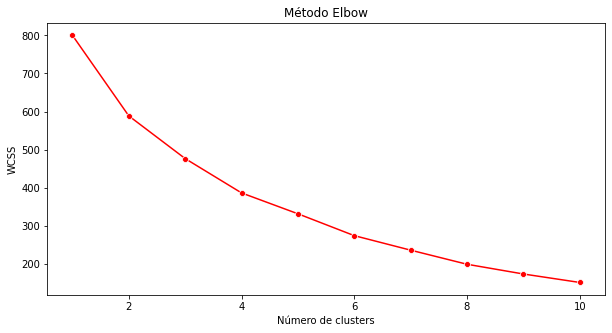

In [55]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), wcss, marker="o", color="red")
plt.title("Método Elbow")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")

Neste gráfico podemos ver que o ponto de inflexão fica entre 5 e 6. Lembrando que o ponto de inflexão define a melhor quantidade de clusters

## Agrupamento

In [56]:
kmeans = KMeans(n_clusters = 6, init = "k-means++", random_state = 5, max_iter = 300)

In [57]:
kmeans2 = kmeans.fit(df2_esc)

In [58]:
# Coordenadas dos centróides
centroides = kmeans2.cluster_centers_
centroides

array([[ 1.12815215,  1.22385356, -0.4498575 , -0.44231533],
       [-0.71852548, -0.46169904,  1.09030974,  1.17305816],
       [-0.88640526,  0.86299444, -0.43455895, -0.40762639],
       [-0.88640526, -0.92608124, -0.70017176,  0.28182355],
       [ 0.25517727,  0.0729628 ,  1.14279271, -1.32381522],
       [ 1.12815215, -0.77111419, -0.08465578,  0.8197479 ]])

In [59]:
# Inversão do escalonamento
escala.inverse_transform(kmeans2.cluster_centers_)

array([[1.00000000e+00, 5.59032258e+01, 4.87741935e+01, 3.88064516e+01],
       [8.33333333e-02, 3.24166667e+01, 8.91250000e+01, 8.04166667e+01],
       [5.55111512e-17, 5.08750000e+01, 4.91750000e+01, 3.97000000e+01],
       [1.66533454e-16, 2.59459459e+01, 4.22162162e+01, 5.74594595e+01],
       [5.66666667e-01, 3.98666667e+01, 9.05000000e+01, 1.61000000e+01],
       [1.00000000e+00, 2.81052632e+01, 5.83421053e+01, 7.13157895e+01]])

In [60]:
# Classificação dos dados
classificacao2 = kmeans2.labels_
classificacao2

array([5, 5, 3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 2, 3, 0, 5, 3, 5, 0, 3, 0, 5,
       2, 5, 2, 5, 2, 5, 2, 3, 0, 3, 0, 5, 2, 3, 2, 3, 2, 3, 2, 5, 0, 3,
       2, 3, 2, 3, 3, 3, 2, 5, 3, 0, 2, 0, 2, 0, 3, 0, 0, 5, 2, 2, 0, 5,
       2, 2, 5, 3, 0, 2, 2, 2, 0, 5, 2, 0, 3, 2, 0, 5, 0, 2, 3, 0, 2, 3,
       3, 2, 2, 5, 0, 2, 3, 5, 2, 3, 0, 5, 3, 2, 0, 5, 0, 3, 2, 0, 0, 0,
       0, 3, 2, 5, 3, 3, 2, 2, 2, 2, 5, 2, 1, 5, 3, 1, 0, 5, 0, 5, 4, 5,
       3, 1, 4, 1, 4, 5, 4, 1, 2, 5, 3, 1, 4, 5, 0, 1, 4, 5, 4, 5, 4, 1,
       4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 5, 4, 5, 4, 5, 4, 1,
       4, 5, 4, 5, 4, 1, 4, 1, 4, 5, 4, 5, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [61]:
# Visualizando a classificação do 4º elemento 
classificacao2[4]

3

Visualizando o agrupamento por uma lista

In [62]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ["Grupo"])
agrupamento2

,Grupo
0,5
1,5
2,3
3,3
4,3
...,...
195,1
196,4
197,1
198,4


In [63]:
# Juntando o atributo Grupo ao dataframe original. Será criado um novo dataframe para manter a integridade dos dados
df4 = pd.concat([df,agrupamento2],axis=1)
df4

,CustomerID,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


In [64]:
# Acessando os dados através do índice
df4.iloc[125,:]

CustomerID       126
genero        Female
idade             31
rendimento        70
pontuacao         77
Grupo              1
Name: 125, dtype: object

# K-means com PCA ( Principal Component Analysis ) ou Análise dos Componentes Principais

In [65]:
# Verificando o dataframe df2_esc
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [66]:
df2_esc.shape

(200, 4)

## Componentes principais

O que o PCA faz?

PCA, ou Principal Component Analysis é uma técnica para reduzir a dimensão de um conjunto de dados preservando, de certa forma, suas propriedades. 

O uso da técnica PCA na redução da dimensão de dados é justificado pela fácil representação de dados multidimensionais, utilizando a informação contida na matriz de covariância dos dados, princípios da álgebra linear e estatística básica.

In [67]:
# Importando a biblioteca necessária: PCA
from sklearn.decomposition import PCA

In [68]:
# Reduzindo para 2 a quantidade de atributos necessários utilizando o PCA
pca = PCA(n_components=2)

In [69]:
df2_pca = pca.fit_transform(df2_esc)

In [70]:
df2_pca

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

In [71]:
# Razão  das variáveis explicativa
pca.explained_variance_ratio_

array([0.33690046, 0.26230645])

In [72]:
# Soma das variáveis explicativa
pca.explained_variance_ratio_.sum()

0.5992069019819846

A soma das variáveis criadas pelo processo de PCA equivale a 59% da relação com as 4 variáveis iniciais. O ideal é que esse valor seja o mais próximo possível de 100%, o que representaria menor perda de relação com os dados originais.

59% é um valor muito baixo e representa 41% de perda de representação dos dados originais, mas para fins didáticos seguirei com o processo de K-means com o PCA até o final.

## Método Elbow para identificar a quantidade adequada de clusters através do wcss

In [73]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 5, max_iter=300)
    kmeans.fit(df2_pca)
    # inertia - Método para gerar o wcss
    wcss.append(kmeans.inertia_)

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'WCSS')

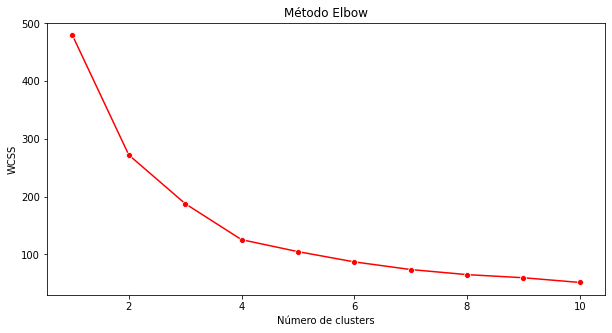

In [75]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), wcss, marker="o", color="red")
plt.title("Método Elbow")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")

In [76]:
# Através do gráfico é possivel identificar o ponto de inflexão, que neste caso seria o 4
# O ponto de inflexão representa a quantidade ideal de clusters

## Agrupamento

In [77]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 5, max_iter = 300)

In [78]:
kmeans3 = kmeans.fit(df2_pca)

In [79]:
# Coordenadas dos centróides
centroides = kmeans3.cluster_centers_
centroides

array([[-1.15208536, -0.48631961],
       [ 0.80089898, -0.95285608],
       [ 1.12773395,  0.75231371],
       [-0.89664028,  1.25740369]])

In [80]:
# Classificação dos dados
classificacao3 = kmeans3.labels_
classificacao3

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 3, 1, 1, 2, 3,
       1, 1, 3, 0, 2, 1, 1, 1, 2, 3, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0,
       0, 1, 1, 3, 2, 1, 0, 3, 1, 0, 2, 3, 0, 1, 2, 3, 2, 0, 1, 2, 2, 2,
       2, 0, 1, 3, 0, 0, 1, 1, 1, 1, 3, 1, 0, 3, 0, 0, 2, 3, 2, 3, 2, 3,
       0, 0, 2, 0, 1, 3, 2, 0, 1, 3, 0, 0, 2, 3, 2, 0, 1, 3, 2, 3, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

## Visualizando graficamente com PLOTLY os agrupamentos por grupo

In [81]:
import plotly.express as px
import plotly.graph_objects as go

In [82]:
graf1 = px.scatter( x = df2_pca[:,0], y = df2_pca[:,1], color = classificacao3)
graf2 = px.scatter( x = centroides[:,0], y = centroides[:,1], size = [15,15,15,15])
graf3 = go.Figure( data = graf1.data + graf2.data)
graf3.update_layout( width=800, height = 500, title_text="Agrupamento K-means")
graf3.update_xaxes(title="Rendimento anual (K$)")
graf3.update_yaxes(title="Pontuação")
graf3.show()

## Visualizando o agrupamento por uma lista

In [83]:
agrupamento3 = pd.DataFrame(classificacao3, columns = ["Grupo"])
agrupamento3

,Grupo
0,0
1,0
2,1
3,0
4,1
...,...
195,3
196,2
197,3
198,2


In [84]:
# Juntando o atributo Grupo ao dataframe original. Será criado um novo dataframe para manter a integridade dos dados
df5 = pd.concat([df,agrupamento3],axis=1)
df5

,CustomerID,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


Visualizando os dados

In [85]:
# Buscando os dados da linha 125
df5.loc[125,:]

CustomerID       126
genero        Female
idade             31
rendimento        70
pontuacao         77
Grupo              0
Name: 125, dtype: object

In [86]:
# Buscando os dados usando o CustomerID
df5.loc[df5.CustomerID == 76]

,CustomerID,genero,idade,rendimento,pontuacao,Grupo
75,76,Male,26,54,54,3


# Agrupamento Hierárquico ( Agglomerative Hierarchical Clustering )

A análise de agrupamentos por métodos hierárquicos  é um método “não supervisionado” de reconhecimento de “padrões naturais” de comportamento em amostras com base em dados multivariados.

O objetivo da técnica é reunir amostras (objetos) com base na sua “proximidade” (semelhança), reduzindo a “dimensionalidade” dos dados e permitindo a visualização de dados multidimensionais através de um gráfico bidimensional chamado dendrograma.

## Algoritmo hierárquico com PCA

In [87]:
# Relembrando o dataframe original
df.head()

,CustomerID,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [88]:
# Visualizando o dataframe escalonado
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [89]:
df2_esc.shape

(200, 4)

## Componentes principais

In [90]:
# Importando a biblioteca necessária: PCA
from sklearn.decomposition import PCA

In [91]:
# Reduzindo para 2 a quantidade de atributos necessários utilizando o PCA
pca = PCA(n_components=2)

In [92]:
df2_pca = pca.fit_transform(df2_esc)

In [93]:
df2_pca

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

Dendrograma

O que é um dendrograma?

Representação esquemática ou diagrama que lembra a estrutura de uma árvore (ex.: dendrograma filogenético).

In [94]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

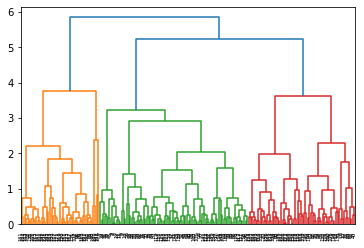

In [95]:
dendrograma = dendrogram(linkage(df2_pca,method = "complete"))

## Vemos no gráfico que o dendrograma fez uma divisão em 3 clusters ( laranja, verde e vermelho )

In [96]:
from sklearn.cluster import AgglomerativeClustering

In [97]:
hier = AgglomerativeClustering(n_clusters=3,affinity="euclidean", linkage="complete")
classificacao4 = hier.fit_predict(df2_pca)

In [98]:
classificacao4

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0,
       2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2,
       1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0,
       0, 0])

## Criando um gráfico de dispersão para representar os 3 clusters criados

In [99]:
import plotly.express as px

In [100]:
graf4 = px.scatter( x = df2_pca[:,0], y = df2_pca[:,1], color = classificacao4)
graf4.update_layout( width=800, height = 500, title_text="Agrupamento Hierárquico")
graf4.show()

Agrupando os dados na nova coluna Grupo

In [101]:
agrupamento4 = pd.DataFrame(classificacao4, columns = ["Grupo"])
agrupamento4

,Grupo
0,2
1,2
2,2
3,2
4,2
...,...
195,0
196,1
197,0
198,0


In [102]:
# Juntando o atributo Grupo ao dataframe original. Será criado um novo dataframe para manter a integridade dos dados
df6 = pd.concat([df,agrupamento4],axis=1)
df6

,CustomerID,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [103]:
# Acessando os dados através do índice
df4.iloc[98,:]

CustomerID      99
genero        Male
idade           48
rendimento      61
pontuacao       42
Grupo            0
Name: 98, dtype: object

## Agrupamento hierárquico com todos atributos

In [104]:
# Usaremos agora o dataframe df2_esc escalonado para criar o modelo
df2_esc.shape

(200, 4)

Criando o dendrograma

In [105]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

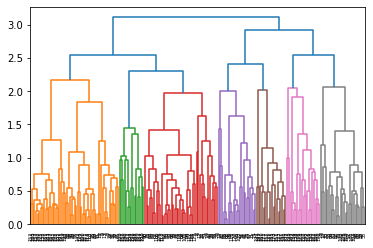

In [106]:
dendrograma = dendrogram(linkage(df2_esc,method = "average"))

Usando como método 'average' ou média no dendrograma e usando a base completa e escalonada fica dividida em 7 grupos ( laranja, verde, vermelho, lilás, marrom, rosa e cinza ), demostrando que a quantidade ideal de clusters será 7. Outros métodos como 'complete', 'single' e 'ward' separam em quantidades diferentes, mas para fins didáticos usarei o método 'average'.

In [107]:
from sklearn.cluster import AgglomerativeClustering

In [108]:
hier = AgglomerativeClustering(n_clusters=7,affinity="euclidean", linkage="average") # o linkage deve ser o mesmo do método
classificacao5 = hier.fit_predict(df2_esc)

In [109]:
classificacao5

array([5, 5, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0, 4, 0, 5, 5, 4, 5, 1, 0, 5, 5,
       4, 5, 4, 5, 4, 5, 4, 0, 1, 0, 1, 5, 4, 0, 4, 0, 4, 0, 4, 5, 1, 0,
       4, 0, 4, 0, 0, 0, 4, 5, 0, 1, 4, 1, 4, 1, 0, 1, 1, 5, 4, 4, 1, 5,
       4, 4, 5, 0, 1, 4, 4, 4, 1, 5, 4, 1, 0, 4, 1, 1, 1, 4, 0, 1, 4, 0,
       4, 4, 4, 5, 1, 4, 4, 5, 4, 0, 1, 5, 0, 4, 1, 5, 1, 0, 4, 1, 1, 1,
       1, 0, 4, 5, 0, 0, 4, 4, 4, 4, 5, 4, 4, 2, 0, 0, 3, 2, 3, 2, 3, 2,
       0, 0, 3, 0, 6, 2, 3, 0, 6, 2, 0, 0, 3, 2, 3, 0, 6, 2, 3, 2, 6, 0,
       6, 0, 3, 0, 3, 0, 6, 0, 3, 0, 3, 0, 3, 0, 6, 2, 3, 2, 3, 2, 6, 0,
       3, 2, 3, 2, 6, 0, 3, 0, 6, 2, 6, 2, 6, 0, 6, 0, 3, 0, 6, 0, 6, 2,
       3, 2])

Agrupamento

In [110]:
agrupamento4 = pd.DataFrame(classificacao5, columns = ["Grupo"])
agrupamento4

,Grupo
0,5
1,5
2,4
3,0
4,4
...,...
195,0
196,6
197,2
198,3


In [111]:
# Juntando o atributo Grupo ao dataframe original. Será criado um novo dataframe para manter a integridade dos dados
df7 = pd.concat([df,agrupamento4],axis=1)
df7

,CustomerID,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,6
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


In [112]:
# Acessando os dados através do índice
df7.iloc[50,:]

CustomerID        51
genero        Female
idade             49
rendimento        42
pontuacao         52
Grupo              4
Name: 50, dtype: object

# DBSCAN - Density Based Spatial Clustering of Application with Noise

DBSCAN, ou traduzindo: Clusterização Espacial Baseada em Densidade de Aplicações com Ruído) é um método de clusterização não paramétrico baseado em densidade, proposto por ESTER et al (1996),  que é significativamente efetivo para  identificar clusters de formato arbitrário e de diferentes tamanhos, identificar e separar os ruídos dos dados e detectar clusters “naturais” e seus arranjos dentro do espaço de dados, sem qualquer informação preliminar sobre os grupos. 

O método requer somente um parâmetro de entrada, mas dá suporte para determinar um apropriado valor para ele.  

## DBSCAN com PCA

Inicialmente utilizaremos o algoritmo DBSCAN associado ao PCA, reduzindo a quantidade de variáveis para a análise.

Usaremos o dataframe df2_esc escalonado.

In [ ]:
df2_esc

In [114]:
df2_esc.shape

(200, 4)

Componentes principais

In [115]:
from sklearn.decomposition import PCA

In [116]:
pca = PCA(n_components=2)

In [117]:
df2_pca =pca.fit_transform(df2_esc)

In [118]:
df2_pca

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

In [119]:
from sklearn.cluster import DBSCAN

In [126]:
dbscan = DBSCAN(eps = 0.32, min_samples= 3)

In [127]:
dbscan.fit(df2_pca)

DBSCAN(eps=0.32, min_samples=3)

In [128]:
classificacao6 = dbscan.labels_

In [129]:
classificacao6

array([ 0,  0, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  3,  1,  2,  0, -1,
        0,  2,  1,  0,  0,  3,  0,  3,  0,  0,  0,  0,  1, -1,  1, -1,  0,
        3,  1,  0, -1,  0,  1,  3,  0,  2,  4,  0, -1,  0,  4,  4,  4,  0,
       -1,  4,  2,  0,  2,  0,  2,  4,  2,  2,  0,  0,  0,  2,  0,  0,  0,
        0,  4,  2,  0,  0,  0,  2,  0,  0,  2,  0,  0,  2,  2,  2,  0,  0,
        2,  0,  0,  0,  0,  2,  0,  2,  0,  0,  0,  0,  0,  2,  0,  0,  0,
        2,  0,  2,  0,  2,  2,  2,  2,  2,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0, -1,  0,  2,  0,  0,  0,  5,  0,
        2,  0,  5,  0, -1,  0,  0,  0,  5, -1,  2,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  5,  0,  2,  0,  2,  0,  2, -1,
        2,  0,  2,  0,  2,  0, -1,  0, -1,  0,  2,  0, -1,  0,  2, -1,  2,
        0,  2,  0,  2,  0, -1,  0,  2,  0,  5, -1, -1, -1])

É possível identificar uma quantidade considerável de ruídos ( -1 ) na criação do modelo utilizando PCA. Ajustando o eps que define o raio de seleção do cluster ( default = 0.5 ) para valores maiores cria uma predominância do cluster 0. Encontramos um maior equilíbrio com eps = 0.32, mesmo com tantos ruídos.

In [124]:
import plotly.express as px

In [130]:
graf5 = px.scatter( x = df2_pca[:,0], y = df2_pca[:,1], color = classificacao6)
graf5.update_layout( width=800, height = 500, title_text="Agrupamento DBSCAN")
graf5.show()

Agrupamento

In [131]:
agrupamento5 = pd.DataFrame(classificacao6, columns=["Grupo"])

In [132]:
agrupamento5

,Grupo
0,0
1,0
2,-1
3,1
4,-1
...,...
195,0
196,5
197,-1
198,-1


Juntando o atributo Grupo ao dataframe original. Será criado um novo dataframe para manter a integridade dos dados

In [133]:
df8 = pd.concat([df,agrupamento5],axis=1)
df8

,CustomerID,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,5
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1
